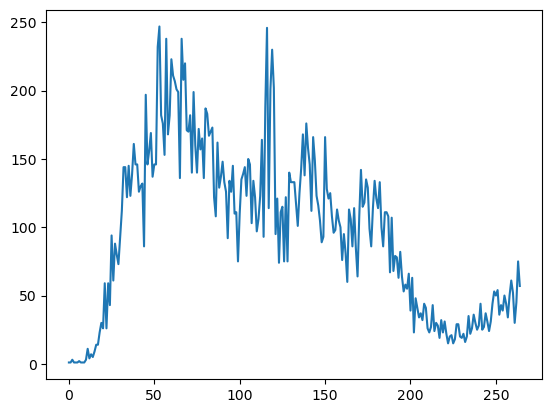

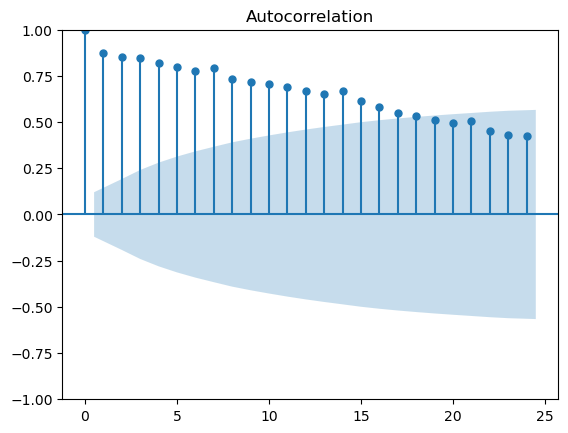

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


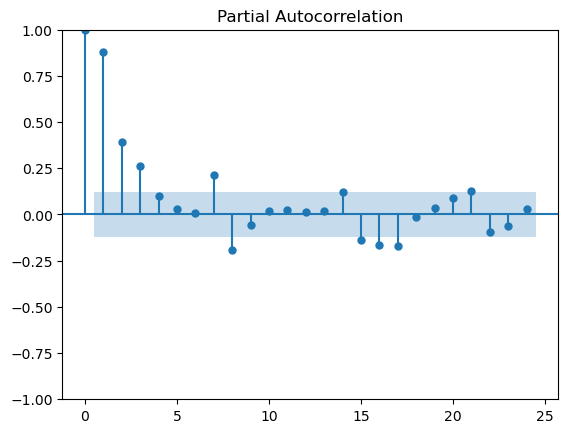

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\澎湖縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Penghu.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Penghu_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Penghu_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\澎湖縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        1
2        3
3        1
4        1
..     ...
261     30
262     45
263     75
264     57
265     56

[266 rows x 1 columns]
266


## LSTM架構

### Model3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
24/24 [==============================] - 4s 39ms/step - loss: 0.0671 - mse: 0.0671 - val_loss: 0.1109 - val_mse: 0.1109
Epoch 2/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0667 - mse: 0.0667 - val_loss: 0.1091 - val_mse: 0.1091
Epoch 3/5000
24/24 [==============================

24/24 [==============================] - 0s 17ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0703 - val_mse: 0.0703
Epoch 57/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0701 - val_mse: 0.0701
Epoch 58/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0699 - val_mse: 0.0699
Epoch 59/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0696 - val_mse: 0.0696
Epoch 60/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0694 - val_mse: 0.0694
Epoch 61/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0693 - val_mse: 0.0693
Epoch 62/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 63/5000
24/24 [==============================] - 0s 14ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 118/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 119/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 120/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 121/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 122/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 123/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 124/5000
24/24 [==============================] - 0s 15ms/step - los

24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 179/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 180/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 181/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 182/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 183/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 184/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 185/5000
24/24 [==============================] - 0s 12ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 240/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 241/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 242/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 243/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 244/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 245/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 246/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 301/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 302/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 303/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 304/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 305/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 306/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 307/5000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 362/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 363/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 364/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 365/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 366/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 367/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 368/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 423/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 424/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 425/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 426/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 427/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 428/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 429/5000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 484/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 485/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 486/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 487/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 488/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 489/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 490/5000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 545/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 546/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 547/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 548/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 549/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 550/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 551/5000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 606/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 607/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 608/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 609/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 610/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 611/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 612/5000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 667/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 668/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 669/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 670/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 671/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 672/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 673/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 728/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 729/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 730/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 731/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 732/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 733/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 734/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 789/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 790/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 791/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 792/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 793/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 794/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 795/5000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 13ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 850/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 851/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 852/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 853/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 854/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 855/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 856/5000
24/24 [==============================] - 0s 8ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 911/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 912/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 913/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 914/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 915/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 916/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 917/5000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 972/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 973/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 974/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 975/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 976/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 977/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 978/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

Epoch 1032/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 1033/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 1034/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1035/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 1036/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1037/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1038/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 1039/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1093/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1094/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 1095/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1096/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 1097/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1098/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 1099/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1153/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 1154/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 1155/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 1156/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 1157/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 1158/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 1159/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 1160/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 1214/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 1215/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 1216/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 1217/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 1218/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 1219/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 1220/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1274/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 1275/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 1276/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 1277/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 1278/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 1279/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 1280/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 1281/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 1335/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 1336/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 1337/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 1338/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 1339/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 1340/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 1341/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1395/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 1396/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 1397/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 1398/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 1399/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 1400/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 1401/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 1402/5000
24/24 [==============================]

24/24 [==============================] - 0s 8ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 1456/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 1457/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 1458/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 1459/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 1460/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 1461/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 1462/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1516/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 1517/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 1518/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 1519/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 1520/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 1521/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 1522/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 1523/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 1577/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 1578/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 1579/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 1580/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0596 - val_mse: 0.0596
Epoch 1581/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 1582/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 1583/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 1637/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 1638/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 1639/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 1640/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 1641/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 1642/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 1643/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 1644/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 1698/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 1699/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 1700/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 1701/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 1702/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 1703/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 1704/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1758/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0587 - val_mse: 0.0587
Epoch 1759/5000
24/24 [==============================] - 0s 18ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0586 - val_mse: 0.0586
Epoch 1760/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 1761/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 1762/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 1763/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0586 - val_mse: 0.0586
Epoch 1764/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0587 - val_mse: 0.0587
Epoch 1765/5000
24/24 [=============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 1819/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 1820/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 1821/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 1822/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 1823/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 1824/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 1825/5000
24/24 [==============================] - 0s 8ms/step - 

Epoch 1879/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0553 - mse: 0.0553 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 1880/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 1881/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 1882/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 1883/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 1884/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 1885/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 1886/5000
24/24 [==============================]

24/24 [==============================] - 0s 10ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 1940/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0574 - val_mse: 0.0574
Epoch 1941/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0574 - val_mse: 0.0574
Epoch 1942/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 1943/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 1944/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 1945/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0547 - mse: 0.0547 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 1946/5000
24/24 [==============================] - 0s 9ms/step -

Epoch 2000/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0568 - val_mse: 0.0568
Epoch 2001/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 2002/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 2003/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 2004/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0568 - val_mse: 0.0568
Epoch 2005/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 2006/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 2007/5000
24/24 [==============================] 

24/24 [==============================] - 0s 12ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 2061/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 2062/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 2063/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 2064/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 2065/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 2066/5000
24/24 [==============================] - 0s 16ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 2067/5000
24/24 [==============================] - 0s 15ms/ste

24/24 [==============================] - 0s 8ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 2121/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 2122/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 2123/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 2124/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0553 - val_mse: 0.0553
Epoch 2125/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 2126/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 2127/5000
24/24 [==============================] - 0s 9ms/step - 

Epoch 2181/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 2182/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0548 - val_mse: 0.0548
Epoch 2183/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 2184/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 2185/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 2186/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 2187/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 2188/5000
24/24 [==============================]

24/24 [==============================] - 0s 9ms/step - loss: 0.0515 - mse: 0.0515 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 2242/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0515 - mse: 0.0515 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 2243/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0515 - mse: 0.0515 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 2244/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0514 - mse: 0.0514 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 2245/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0514 - mse: 0.0514 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 2246/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0514 - mse: 0.0514 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 2247/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0514 - mse: 0.0514 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 2248/5000
24/24 [==============================] - 0s 14ms/step

24/24 [==============================] - 0s 9ms/step - loss: 0.0506 - mse: 0.0506 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 2302/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0506 - mse: 0.0506 - val_loss: 0.0528 - val_mse: 0.0528
Epoch 2303/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0506 - mse: 0.0506 - val_loss: 0.0528 - val_mse: 0.0528
Epoch 2304/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0528 - val_mse: 0.0528
Epoch 2305/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 2306/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 2307/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 2308/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 2362/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 2363/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 2364/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0495 - mse: 0.0495 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 2365/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0495 - mse: 0.0495 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 2366/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0495 - mse: 0.0495 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 2367/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0495 - mse: 0.0495 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 2368/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0495 - mse: 0.0495 - val_loss: 0.0516 - val_mse: 0.0516
Epoch 2369/5000
24/24 [===========================

24/24 [==============================] - 0s 12ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0504 - val_mse: 0.0504
Epoch 2423/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 2424/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 2425/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 2426/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0504 - val_mse: 0.0504
Epoch 2427/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0504 - val_mse: 0.0504
Epoch 2428/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0504 - val_mse: 0.0504
Epoch 2429/5000
24/24 [==============================] - 0s 9ms/step 

24/24 [==============================] - 0s 8ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0492 - val_mse: 0.0492
Epoch 2483/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 2484/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 2485/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 2486/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 2487/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 2488/5000
24/24 [==============================] - 0s 17ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 2489/5000
24/24 [==============================] - 0s 10ms/st

24/24 [==============================] - 0s 15ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 2543/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 2544/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 2545/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 2546/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 2547/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 2548/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 2549/5000
24/24 [==============================] - 0s 12ms/ste

24/24 [==============================] - 0s 14ms/step - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 2603/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0457 - val_mse: 0.0457
Epoch 2604/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 2605/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 2606/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0457 - val_mse: 0.0457
Epoch 2607/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 2608/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 2609/5000
24/24 [==============================] - 0s 13ms/st

24/24 [==============================] - 0s 14ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 2663/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0439 - val_mse: 0.0439
Epoch 2664/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 2665/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 2666/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 2667/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 2668/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 2669/5000
24/24 [==============================] - 0s 8ms/step

24/24 [==============================] - 0s 12ms/step - loss: 0.0407 - mse: 0.0407 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 2723/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0407 - mse: 0.0407 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 2724/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 2725/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 2726/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 2727/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 2728/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 2729/5000
24/24 [==============================] - 0s 11ms/st

24/24 [==============================] - 0s 13ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 2783/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 2784/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 2785/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 2786/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 2787/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 2788/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 2789/5000
24/24 [==============================] - 0s 11ms/s

24/24 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 2843/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 2844/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 2845/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 2846/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 2847/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 2848/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 2849/5000
24/24 [==============================] - 0s 7ms/st

24/24 [==============================] - 0s 12ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 2903/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 2904/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 2905/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 2906/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 2907/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 2908/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 2909/5000
24/24 [==============================] - 0s 11ms/st

24/24 [==============================] - 0s 12ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 2963/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 2964/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 2965/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 2966/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 2967/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 2968/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 2969/5000
24/24 [==============================] - 0s 13ms/

24/24 [==============================] - 0s 13ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 3023/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 3024/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 3025/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 3026/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 3027/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 3028/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 3029/5000
24/24 [==============================] - 0s 12ms

24/24 [==============================] - 0s 14ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 3083/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 3084/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 3085/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 3086/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 3087/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 3088/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 3089/5000
24/24 [==============================] - 0s 13ms/s

24/24 [==============================] - 0s 16ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 3143/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 3144/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 3145/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 3146/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 3147/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 3148/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 3149/5000
24/24 [==============================] - 0s 14ms/

24/24 [==============================] - 0s 12ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 3203/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 3204/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 3205/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 3206/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 3207/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 3208/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 3209/5000
24/24 [==============================] - 0s 8ms/s

24/24 [==============================] - 0s 14ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 3263/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 3264/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 3265/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 3266/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 3267/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 3268/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 3269/5000
24/24 [==============================] - 0s 11ms/

24/24 [==============================] - 0s 11ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 3323/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 3324/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 3325/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 3326/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 3327/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 3328/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 3329/5000
24/24 [==============================] - 0s 13ms/s

24/24 [==============================] - 0s 18ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 3383/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 3384/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 3385/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 3386/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 3387/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 3388/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 3389/5000
24/24 [==============================] - 0s 8ms/s

24/24 [==============================] - 0s 14ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 3443/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 3444/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 3445/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 3446/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 3447/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 3448/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 3449/5000
24/24 [==============================] - 0s 8ms/s

24/24 [==============================] - 0s 8ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 3503/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 3504/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 3505/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 3506/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 3507/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 3508/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 3509/5000
24/24 [==============================] - 0s 7ms/s

24/24 [==============================] - 0s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 3563/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 3564/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 3565/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 3566/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3567/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3568/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3569/5000
24/24 [==============================] - 0s 13ms/

24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3623/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3624/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3625/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3626/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3627/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3628/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3629/5000
24/24 [==============================] - 0s 8ms/st

24/24 [==============================] - 0s 12ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3683/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3684/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3685/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3686/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3687/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3688/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3689/5000
24/24 [==============================] - 0s 7ms/s

24/24 [==============================] - 0s 8ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3743/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3744/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3745/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3746/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3747/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3748/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 3749/5000
24/24 [==============================] - 0s 8ms/ste

24/24 [==============================] - 0s 12ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3803/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3804/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3805/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3806/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3807/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3808/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3809/5000
24/24 [==============================] - 0s 8ms/st

24/24 [==============================] - 0s 11ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3863/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3864/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3865/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 3866/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3867/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3868/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3869/5000
24/24 [==============================] - 0s 13ms/step

24/24 [==============================] - 0s 12ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3923/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3924/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3925/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3926/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3927/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3928/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3929/5000
24/24 [==============================] - 0s 13ms/step

24/24 [==============================] - 0s 14ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3983/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3984/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3985/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3986/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3987/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3988/5000
24/24 [==============================] - 0s 14ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3989/5000
24/24 [==============================] - 0s 17ms/st

24/24 [==============================] - 0s 11ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4043/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4044/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4045/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4046/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4047/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4048/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4049/5000
24/24 [==============================] - 0s 8ms/step 

Epoch 4103/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4104/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4105/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4106/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4107/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4108/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4109/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4110/5000
24/24 [==============================] 

24/24 [==============================] - 0s 11ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4164/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4165/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4166/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4167/5000
24/24 [==============================] - 0s 13ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4168/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4169/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4170/5000
24/24 [==============================] - 0s 7ms/step

24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4224/5000
24/24 [==============================] - 0s 15ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4225/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4226/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4227/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4228/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4229/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4230/5000
24/24 [==============================] - 0s 9ms/step -

Epoch 4284/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4285/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4286/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4287/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4288/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4289/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4290/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4291/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4345/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4346/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4347/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4348/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4349/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4350/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4351/5000
24/24 [==============================] - 0s 11ms/step -

Epoch 4405/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4406/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4407/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4408/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4409/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4410/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4411/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4412/5000
24/24 [==============================]

24/24 [==============================] - 0s 17ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4466/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4467/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4468/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4469/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4470/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4471/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4472/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 4526/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4527/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4528/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4529/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4530/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4531/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4532/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4533/5000
24/24 [=============================

24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4587/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4588/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4589/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4590/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4591/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4592/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4593/5000
24/24 [==============================] - 0s 8ms/step -

Epoch 4647/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4648/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4649/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4650/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4651/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4652/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4653/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4654/5000
24/24 [==============================] 

24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4708/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4709/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4710/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4711/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4712/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4713/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4714/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 4768/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4769/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4770/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4771/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4772/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4773/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4774/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4775/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4829/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4830/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4831/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4832/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4833/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4834/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4835/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 4889/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4890/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4891/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4892/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4893/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4894/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4895/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4896/5000
24/24 [==============================] 

24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4950/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4951/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4952/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4953/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4954/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4955/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4956/5000
24/24 [==============================] - 0s 7ms/step -

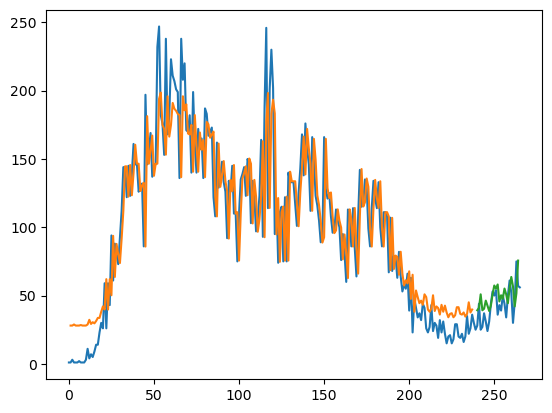

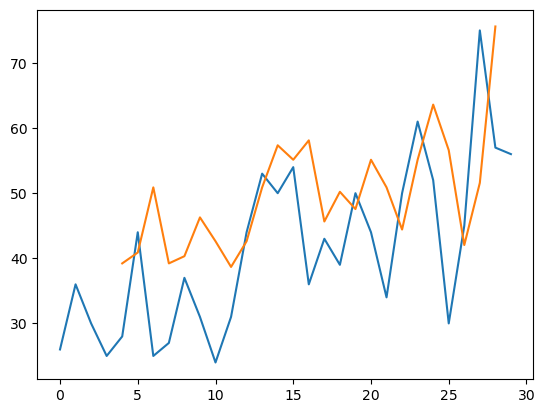

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="penghu_lstm_5000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('penghu_County_lstm_5000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('penghu_County_lstm_5000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("penghu_County_lstm_5000_predict&real_3.png")
plt.show()

### Modle4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 dense_1 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                4416      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,965
Trainable params: 8,965
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
24/24 [==============================] - 2s 27ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.1254 - val_mse: 0.1254
Epoch 2/5000
24/24 [==============================]

24/24 [==============================] - 0s 10ms/step - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 56/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 57/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 58/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 59/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 60/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 61/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 62/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0611 

24/24 [==============================] - 0s 7ms/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 117/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 118/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 119/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 120/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 121/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 122/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 123/5000
24/24 [==============================] - 0s 6ms/step - loss: 0

24/24 [==============================] - 0s 6ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 178/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 179/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 180/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 181/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 182/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 183/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 184/5000
24/24 [==============================] - 0s 6ms/step - loss: 0

24/24 [==============================] - 0s 6ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 239/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 240/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 241/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 242/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 243/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 244/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 245/5000
24/24 [==============================] - 0s 6ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 300/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 301/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 302/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 303/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 304/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 305/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 306/5000
24/24 [==============================] - 0s 6ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0588 - val_mse: 0.0588
Epoch 361/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 362/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0589 - val_mse: 0.0589
Epoch 363/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 364/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 365/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 366/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 367/5000
24/24 [==============================] - 0s 6ms/step - loss: 0

24/24 [==============================] - 0s 6ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0566 - val_mse: 0.0566
Epoch 422/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0543 - mse: 0.0543 - val_loss: 0.0570 - val_mse: 0.0570
Epoch 423/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0561 - val_mse: 0.0561
Epoch 424/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 425/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0541 - mse: 0.0541 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 426/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0540 - mse: 0.0540 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 427/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0539 - mse: 0.0539 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 428/5000
24/24 [==============================] - 0s 6ms/step - loss: 

24/24 [==============================] - 0s 6ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0508 - val_mse: 0.0508
Epoch 483/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 484/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 485/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0487 - mse: 0.0487 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 486/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0503 - val_mse: 0.0503
Epoch 487/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 488/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0503 - val_mse: 0.0503
Epoch 489/5000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0399 - mse: 0.0399 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 544/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 545/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 546/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 547/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 548/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 549/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 550/5000
24/24 [==============================] - 0s 6ms/step - los

24/24 [==============================] - 0s 9ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 605/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 606/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 607/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 608/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 609/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 610/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 611/5000
24/24 [==============================] - 0s 11ms/step - lo

Epoch 665/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 666/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 667/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 668/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 669/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 670/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 671/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 672/5000
24/24 [==============================] - 

Epoch 726/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 727/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 728/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 729/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 730/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 731/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 732/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 733/5000
24/24 [==============================] - 0s 

Epoch 787/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 788/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 789/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 790/5000
24/24 [==============================] - 0s 12ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 791/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 792/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 793/5000
24/24 [==============================] - 0s 11ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 794/5000
24/24 [==============================] - 0s

24/24 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 849/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 850/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 851/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 852/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 853/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 854/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 855/5000
24/24 [==============================] - 0s 6ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 910/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 911/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 912/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 913/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 914/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 915/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 916/5000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 6ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 971/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 972/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 973/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 974/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 975/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 976/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 977/5000
24/24 [==============================] - 0s 6ms/step - loss: 0

24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1032/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1033/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1034/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1035/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1036/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1037/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1038/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 1092/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1093/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1094/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1095/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1096/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1097/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1098/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1099/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1153/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1154/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1155/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1156/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1157/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1158/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1159/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 1213/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1214/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1215/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1216/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1217/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1218/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1219/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1220/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1274/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1275/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1276/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1277/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1278/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1279/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1280/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 1334/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1335/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1336/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1337/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1338/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1339/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1340/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1341/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1395/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1396/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1397/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1398/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1399/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1400/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1401/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 1455/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1456/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1457/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1458/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1459/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1460/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1461/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1462/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1516/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1517/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1518/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1519/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1520/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1521/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1522/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 1576/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1577/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1578/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1579/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1580/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1581/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1582/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1583/5000
24/24 [==============================]

24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1637/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1638/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1639/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1640/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1641/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1642/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1643/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 1697/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1698/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1699/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1700/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1701/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1702/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1703/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1704/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1758/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1759/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1760/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1761/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1762/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1763/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1764/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 1818/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1819/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1820/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1821/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1822/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1823/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1824/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1825/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1879/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1880/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1881/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1882/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1883/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1884/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1885/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 1939/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1940/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1941/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1942/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1943/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1944/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1945/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1946/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2000/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2001/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2002/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2003/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2004/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2005/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2006/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 2060/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2061/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2062/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2063/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2064/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2065/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2066/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2067/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2121/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2122/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2123/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2124/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2125/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2126/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2127/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 2181/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2182/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2183/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2184/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2185/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2186/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2187/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2188/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2242/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2243/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2244/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2245/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2246/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2247/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2248/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 2302/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2303/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2304/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2305/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2306/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2307/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2308/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2309/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2363/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2364/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2365/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2366/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2367/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2368/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2369/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 2423/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2424/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2425/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2426/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2427/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2428/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2429/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2430/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2484/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2485/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2486/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2487/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2488/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2489/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2490/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 2544/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2545/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2546/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2547/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2548/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2549/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2550/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2551/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2605/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2606/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2607/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2608/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2609/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2610/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2611/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 2665/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2666/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2667/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2668/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2669/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2670/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2671/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2672/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2726/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2727/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2728/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2729/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2730/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2731/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2732/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 2786/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2787/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2788/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2789/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2790/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2791/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2792/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2793/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2847/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2848/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2849/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2850/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2851/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2852/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2853/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 2907/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2908/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2909/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2910/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2911/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2912/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2913/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2914/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2968/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2969/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2970/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2971/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2972/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2973/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2974/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 3028/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3029/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3030/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3031/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3032/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3033/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3034/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3035/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3089/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3090/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3091/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3092/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3093/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3094/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3095/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 3149/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3150/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3151/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3152/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3153/5000
24/24 [==============================] - 0s 10ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3154/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3155/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3156/5000
24/24 [==============================]

24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3210/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3211/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3212/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3213/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3214/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3215/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3216/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 3270/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3271/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3272/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3273/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3274/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3275/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3276/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3277/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3331/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3332/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3333/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3334/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3335/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3336/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3337/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 3391/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3392/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3393/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3394/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3395/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3396/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3397/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3398/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3452/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3453/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3454/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3455/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3456/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3457/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3458/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 3512/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3513/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3514/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3515/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3516/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3517/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3518/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3519/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3573/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3574/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3575/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3576/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3577/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3578/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3579/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 3633/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3634/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3635/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3636/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3637/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3638/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3639/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3640/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3694/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3695/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3696/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3697/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3698/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3699/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3700/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 3754/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3755/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3756/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3757/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3758/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3759/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3760/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3761/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3815/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3816/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3817/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3818/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3819/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3820/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3821/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 3875/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3876/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3877/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3878/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3879/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3880/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3881/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3882/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3936/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3937/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3938/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3939/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3940/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3941/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3942/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 3996/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3997/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3998/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3999/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4000/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4001/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4002/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4003/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4057/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4058/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4059/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4060/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4061/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4062/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4063/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 4117/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4118/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4119/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4120/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4121/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4122/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4123/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4124/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4178/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4179/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4180/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4181/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4182/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4183/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4184/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 4238/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4239/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4240/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4241/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4242/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4243/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4244/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4245/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4299/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4300/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4301/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4302/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4303/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4304/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4305/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 4359/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4360/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4361/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4362/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4363/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4364/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4365/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4366/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4420/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4421/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4422/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4423/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4424/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4425/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4426/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 4480/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4481/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4482/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4483/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4484/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4485/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4486/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4487/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4541/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4542/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4543/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4544/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4545/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4546/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4547/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 4601/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4602/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4603/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4604/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4605/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4606/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4607/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4608/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4662/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4663/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4664/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4665/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4666/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4667/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4668/5000
24/24 [==============================] - 0s 6ms/step - 

Epoch 4722/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4723/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4724/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4725/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4726/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4727/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4728/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4729/5000
24/24 [==============================] 

24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4783/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4784/5000
24/24 [==============================] - 0s 8ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4785/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4786/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4787/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4788/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4789/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 4843/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4844/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4845/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4846/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4847/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4848/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4849/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4850/5000
24/24 [==============================] 

24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4904/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4905/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4906/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4907/5000
24/24 [==============================] - 0s 9ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4908/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4909/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4910/5000
24/24 [==============================] - 0s 7ms/step - 

Epoch 4964/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4965/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4966/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4967/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4968/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4969/5000
24/24 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4970/5000
24/24 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4971/5000
24/24 [==============================] 

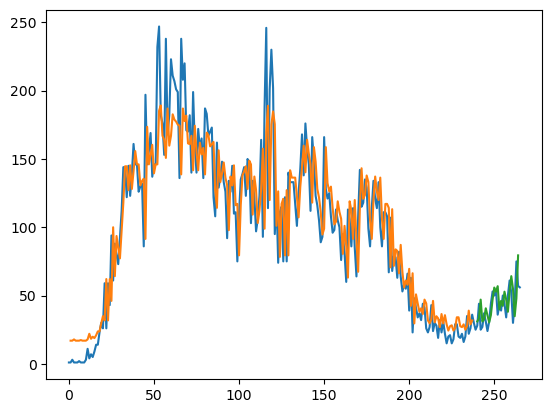

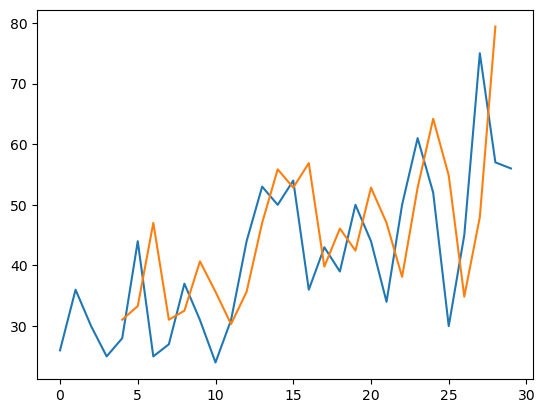

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='relu'),
    SimpleRNN(64, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="penghu_lstm_5000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('penghu_lstm_5000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('penghu_lstm_5000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("penghu_lstm_5000_predict&real_4.png")
plt.show()